In [1]:
import os
import pretty_midi
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import sys

In [3]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


In [4]:
workdir = "C:\\Users\\toend\\Documents\\ITU\\Thesis"
sys.path.append(workdir + '\\Code\\Utils')
from Utils import getDataSets

In [5]:
X1, X2, X3, X4 = getDataSets(workdir)
X = np.concatenate((X1, X2, X3, X4))

In [6]:
Y1 = np.zeros((len(X1), 4))
Y2 = np.zeros((len(X2), 4))
Y3 = np.zeros((len(X3), 4))
Y4 = np.zeros((len(X4), 4))

for i in range(0, len(Y1)):
    Y1[i] = [1, 0, 0, 0]
    
for i in range(0, len(Y2)):
    Y2[i] = [0, 1, 0, 0]
    
for i in range(0, len(Y3)):
    Y3[i] = [0, 0, 1, 0]
    
for i in range(0, len(Y4)):
    Y4[i] = [0, 0, 0, 1]

Y = np.concatenate((Y1, Y2, Y3, Y4))
print(Y.shape)

(510, 4)


In [7]:
Z = list(zip(X, Y))

random.shuffle(Z)

X, Y = zip(*Z)

print(np.array(X).shape)
print(np.array(Y).shape)

(510, 3000, 128)
(510, 4)


In [8]:
validationX = X[500:]
validationY = Y[500:]

print(np.array(validationX).shape)
print(np.array(validationY).shape)

X = X[:500]
Y = Y[:500]

print(np.array(X).shape)
print(np.array(Y).shape)

(10, 3000, 128)
(10, 4)
(500, 3000, 128)
(500, 4)


In [9]:
XhalfingPoint = int(len(X)/100*80)

X_train = np.array(X[:XhalfingPoint])
print(X_train.shape)
X_test = np.array(X[XhalfingPoint:])
print(X_test.shape)

YhalfingPoint = int(len(Y)/100*80)

y_train = np.array(Y[:YhalfingPoint])
print(y_train.shape)
y_test = np.array(Y[YhalfingPoint:])
print(y_test.shape)

(400, 3000, 128)
(100, 3000, 128)
(400, 4)
(100, 4)


In [10]:
model = Sequential()
model.add(Bidirectional(LSTM(128), input_shape=X_train.shape[1:]))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Save model
model.save('BLSTMclassifier.h5')
print(model.summary())
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 264,196
Trainable params: 264,196
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 100 samples
Epoch 1/20
400/400 [==============================] - 263s 658ms/step - loss: 1.3745 - accuracy: 0.3100 - val_loss: 1.3720 - val_accuracy: 0.2900
Epoch 2/20


KeyboardInterrupt: 

In [ ]:
# load model
model = load_model('BLSTMclassifier.h5')
# summarize model.
model.summary()

In [15]:
pred = model.predict(np.array(validationX))

In [16]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

12/12 [==============================] - 1s 124ms/step
Test set
  Loss: 1.807
  Accuracy: 0.250


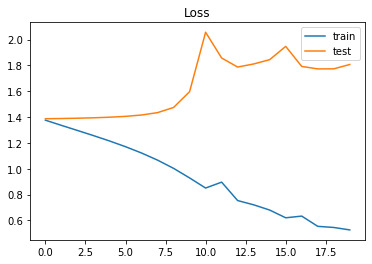

In [17]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

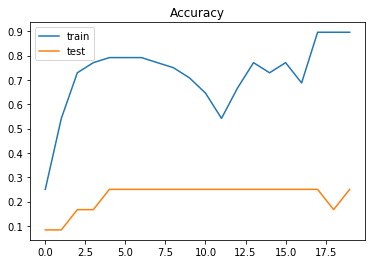

In [18]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [19]:
print(pred)

[[0.38944933 0.4630764  0.10421656 0.04325772]
 [0.24687834 0.4052171  0.19731002 0.15059452]
 [0.23608473 0.57364935 0.12752432 0.06274159]
 [0.228263   0.4643279  0.212775   0.09463406]
 [0.10208665 0.7974003  0.0696407  0.03087238]
 [0.09558826 0.3904557  0.16408779 0.34986833]
 [0.08765828 0.66675645 0.16888757 0.07669772]]


In [20]:
print(validationY)

(array([1., 0., 0., 0.]), array([1., 0., 0., 0.]), array([0., 0., 1., 0.]), array([0., 0., 1., 0.]), array([1., 0., 0., 0.]), array([0., 0., 0., 1.]), array([0., 1., 0., 0.]))
